In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas.plotting import autocorrelation_plot as aplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import math

/Users/alh/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Arima Model

In [2]:
def GetData2(fileName):
    return read_csv(fileName, header=0, parse_dates=[0],index_col=0, usecols=[2,3])
series2 = GetData2('/Users/alh/Downloads/train.csv')

In [3]:
df2=series2.Weekly_Sales

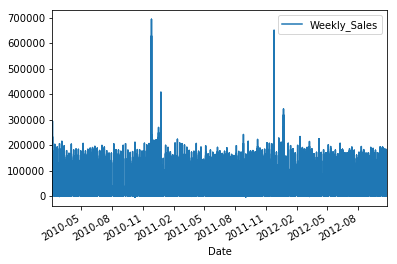

In [4]:
series2.plot()

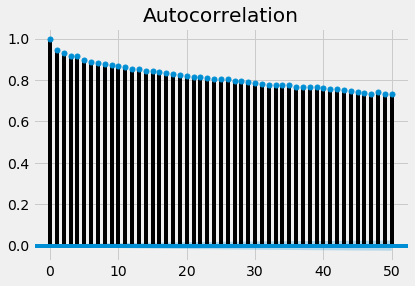

In [39]:
plot_acf(df2, lags=50)
plt.show()

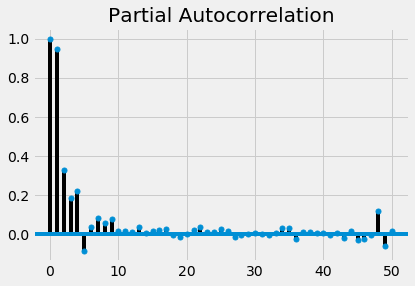

In [40]:
plot_pacf(df2, lags=50)
plt.show()

In [41]:
nparray=np.array(series2)
type(series2)

pandas.core.frame.DataFrame

In [42]:
mod = SARIMAX(nparray, order=(5,1,0), seasonal_order=(0,0,0,0),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4388      0.000  -4032.111      0.000      -0.439      -0.439
ar.L2         -0.2751      0.000  -1080.187      0.000      -0.276      -0.275
ar.L3         -0.2037      0.000   -578.978      0.000      -0.204      -0.203
ar.L4          0.0581      0.000    155.402      0.000       0.057       0.059
ar.L5         -0.0426      0.000   -156.339      0.000      -0.043      -0.042
sigma2      4.504e+07   6.22e-12   7.24e+18      0.000     4.5e+07     4.5e+07


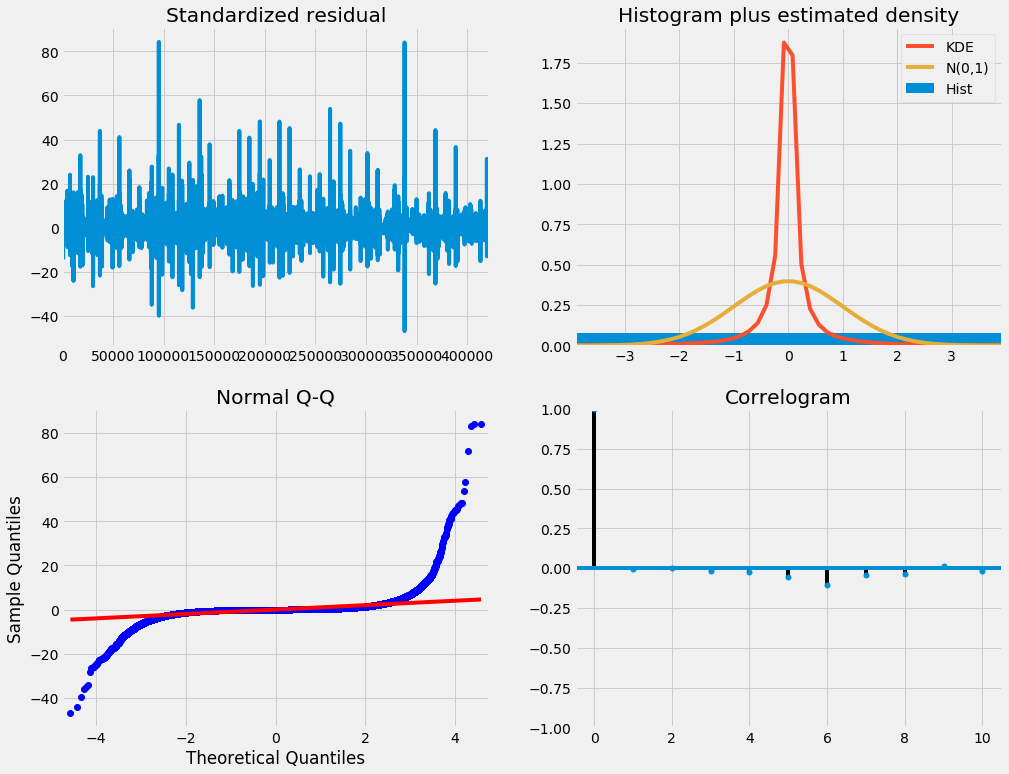

In [43]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [44]:
pred = results.get_prediction()

In [45]:
X_forecasted = pred.predicted_mean
X_truth = [x for x in series2['Weekly_Sales']]
mse = mean_squared_error(X_truth, X_forecasted)
rmse=math.sqrt(mse)
print(rmse)

6711.195427231983


In [46]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(X_truth, X_forecasted)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 2173.76825575


# Random Forest

In [53]:
features = pd.read_csv('/Users/alh/Downloads/features.csv')
train = pd.read_csv('/Users/alh/Downloads/train.csv')
stores = pd.read_csv('/Users/alh/Documents/Stores.csv')
test = pd.read_csv('/Users/alh/Downloads/test.csv')

In [54]:
comtrain=pd.merge(train,stores, how='left',on='Store')
comTrain = pd.merge(comtrain,features, how='inner',on=['Store','Date'])
comTrain = comTrain.drop(['IsHoliday_y'],axis=1)

In [55]:
comtest=pd.merge(test,stores, how='left',on='Store')
comTest = pd.merge(comtest,features, how='inner',on=['Store','Date'])

In [56]:
comTrain = comTrain.fillna(0)
comTrain['IsHoliday_x'] = comTrain['IsHoliday_x'].astype(int)
comTrain['Type']=comTrain['Type'].astype('category').cat.codes
comTrain['Date'] = pd.DatetimeIndex(comTrain['Date']).astype(np.int64) // 10**9
comTrain = comTrain[['Store', 'Dept', 'Date',  'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales']]
comTrain.head()

,Store,Dept,Date,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,1265328000,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,24924.50
1,1,2,1265328000,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,50605.27
2,1,3,1265328000,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,13740.12
3,1,4,1265328000,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,39954.04
4,1,5,1265328000,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,32229.38


In [57]:
comTest = comTest.fillna(0)
comTest['IsHoliday_x'] = comTest['IsHoliday_x'].astype(int)
comTest['Type']=comTest['Type'].astype('category').cat.codes
comTest['Date'] = pd.DatetimeIndex(comTest['Date']).astype(np.int64) // 10**9
comTest.head()

,Store,Dept,Date,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,1351814400,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
1,1,2,1351814400,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
2,1,3,1351814400,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
3,1,4,1351814400,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
4,1,5,1351814400,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False


In [58]:
features=comTrain.copy()
labels = np.array(features['Weekly_Sales'])
features= features.drop('Weekly_Sales', axis = 1)
feature_list = list(features.columns)

In [59]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [60]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (316177, 15)
Training Labels Shape: (316177,)
Testing Features Shape: (105393, 15)
Testing Labels Shape: (105393,)


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
rf.fit(train_features, train_labels);
predictions = rf.predict(test_features)

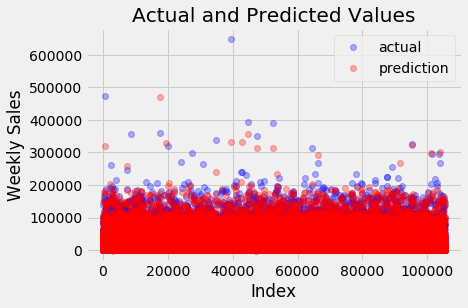

In [62]:
plt.plot(test_labels, 'bo', label = 'actual', alpha = 0.3)
plt.plot(predictions , 'ro', label = 'prediction', alpha = 0.3)
plt.legend()
plt.xlabel('Index'); plt.ylabel('Weekly Sales'); plt.title('Actual and Predicted Values');

In [63]:
print("R^2:", metrics.r2_score(test_labels, predictions))
print("MAE:", metrics.mean_absolute_error(test_labels, predictions))

R^2: 0.957512240362
MAE: 1754.87465685


In [64]:
importances = list(rf.feature_importances_)
feature_importances = [(features, round(importance, 2)) for features, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Dept                 Importance: 0.63
Variable: Size                 Importance: 0.18
Variable: Store                Importance: 0.05
Variable: CPI                  Importance: 0.03
Variable: Date                 Importance: 0.02
Variable: Temperature          Importance: 0.02
Variable: MarkDown3            Importance: 0.02
Variable: Type                 Importance: 0.01
Variable: Fuel_Price           Importance: 0.01
Variable: Unemployment         Importance: 0.01
Variable: IsHoliday_x          Importance: 0.0
Variable: MarkDown1            Importance: 0.0
Variable: MarkDown2            Importance: 0.0
Variable: MarkDown4            Importance: 0.0
Variable: MarkDown5            Importance: 0.0


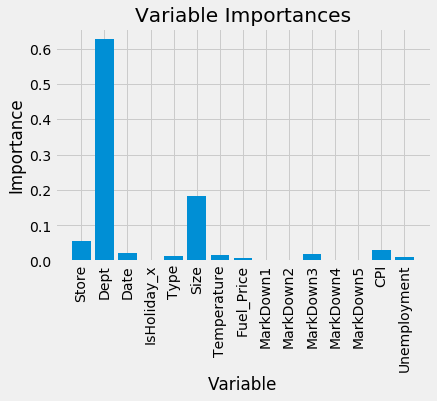

In [65]:
%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [66]:
features2=comTrain.copy()
labels2 = np.array(features2['Weekly_Sales'])
features2= features2.drop(['Weekly_Sales','IsHoliday_x','MarkDown1','MarkDown2','MarkDown4','MarkDown5'], axis = 1)
feature_list2 = list(features2.columns)

In [67]:
from sklearn.model_selection import train_test_split
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(features2, labels2, test_size = 0.25, random_state = 42)

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators = 20, random_state = 42)
rf2.fit(train_features2, train_labels2);
predictions2 = rf2.predict(test_features2)

In [69]:
from sklearn import metrics
print("R^2:", metrics.r2_score(test_labels2, predictions2))
print("MAE:", metrics.mean_absolute_error(test_labels2, predictions2))


R^2: 0.951449228118
MAE: 1764.09304339
